## Importing Required Libraries and Packages


In [1]:
# Import essential libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib


# Machine learning and preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats.mstats import trimmed_var
from sklearn.pipeline import make_pipeline

## Loading Dataset File

In [2]:
# creating a filepath 
filepath = "customer_segmentation_data.csv"


In [3]:
# reading the csv file 
data = pd.read_csv(filepath)

In [4]:
# loading the dataset into a pandas dataframe
df = pd.DataFrame(data)

##  Data Cleaning

In [5]:
# Top 5 row preview and column view
df.head()

id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08

#### Dataset contains nine (9) fields or columns

In [6]:
# droping the id column as dataframe contains a index column
df.drop(columns = 'id', inplace = True)

In [7]:
# Exploring column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   object 
 2   income                1000 non-null   int64  
 3   spending_score        1000 non-null   int64  
 4   membership_years      1000 non-null   int64  
 5   purchase_frequency    1000 non-null   int64  
 6   preferred_category    1000 non-null   object 
 7   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


#### Dataset contains 1,000 entries or observations

In [8]:
# Decriptive statistics of the numeric columns
df.describe()

age         income  spending_score  membership_years  \
count  1000.000000    1000.000000     1000.000000        1000.00000   
mean     43.783000   88500.800000       50.685000           5.46900   
std      15.042213   34230.771122       28.955175           2.85573   
min      18.000000   30004.000000        1.000000           1.00000   
25%      30.000000   57911.750000       26.000000           3.00000   
50%      45.000000   87845.500000       50.000000           5.00000   
75%      57.000000  116110.250000       76.000000           8.00000   
max      69.000000  149973.000000      100.000000          10.00000   

       purchase_frequency  last_purchase_amount  
count         1000.000000           1000.000000  
mean            26.596000            492.348670  
std             14.243654            295.744253  
min              1.000000             10.400000  
25%             15.000000            218.762500  
50%             27.000000            491.595000  
75%             39.000000            747.170000  
max             50.000000            999.740000

In [9]:
# Checking for NA values
df.isna().sum()

age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

#### There are no NA values in the dataset

In [10]:
# Checking for duplicates
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

#### There are no duplicate entries or observations in the dataset

## Exploratory Data Analysis

In [11]:
df.columns

Index(['age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

In [12]:
# checking for data types of the fields
df.dtypes

age                       int64
gender                   object
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category       object
last_purchase_amount    float64
dtype: object

In [13]:
df.select_dtypes(include = 'number').describe().round(1)

age    income  spending_score  membership_years  purchase_frequency  \
count  1000.0    1000.0          1000.0            1000.0              1000.0   
mean     43.8   88500.8            50.7               5.5                26.6   
std      15.0   34230.8            29.0               2.9                14.2   
min      18.0   30004.0             1.0               1.0                 1.0   
25%      30.0   57911.8            26.0               3.0                15.0   
50%      45.0   87845.5            50.0               5.0                27.0   
75%      57.0  116110.2            76.0               8.0                39.0   
max      69.0  149973.0           100.0              10.0                50.0   

       last_purchase_amount  
count                1000.0  
mean                  492.3  
std                   295.7  
min                    10.4  
25%                   218.8  
50%                   491.6  
75%                   747.2  
max                   999.7

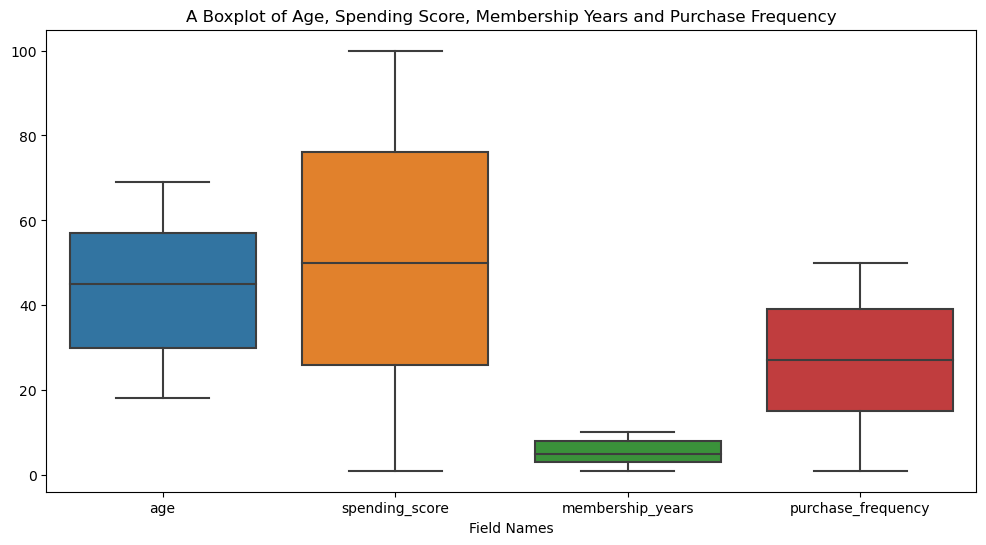

In [14]:
plt.figure(figsize = (12,6))
fig = sns.boxplot(df[['age', 'spending_score', 'membership_years', 'purchase_frequency']])
plt.title('A Boxplot of Age, Spending Score, Membership Years and Purchase Frequency')
plt.xlabel('Field Names');

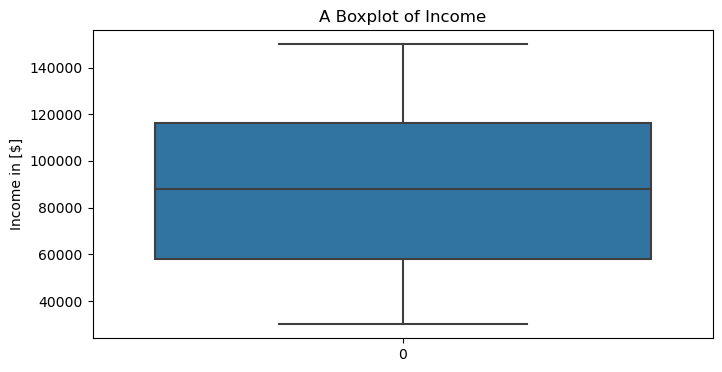

In [15]:
plt.figure(figsize = (8,4))
fig = sns.boxplot(df['income'])
plt.title('A Boxplot of Income')
plt.ylabel('Income in [$]');

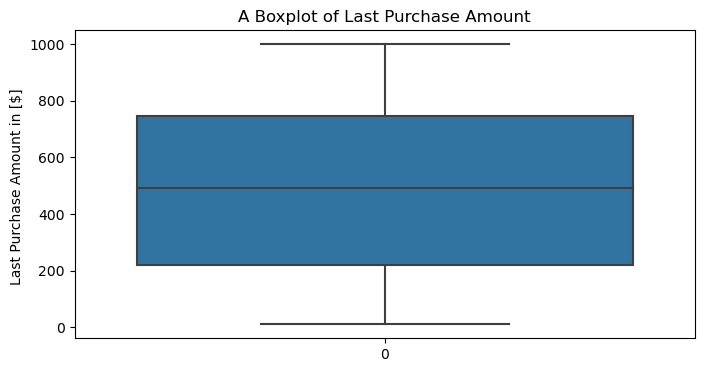

In [16]:
plt.figure(figsize = (8,4))
fig = sns.boxplot(df['last_purchase_amount'])
plt.title('A Boxplot of Last Purchase Amount')
plt.ylabel('Last Purchase Amount in [$] ');

#### The boxplot of all field revealed no outlier in the the fields

In [17]:
min_age = df["age"].min()
min_age

18

In [18]:
median_age = df["age"].median()
median_age

45.0

In [19]:
average_age = df["age"].mean()
average_age

43.783

In [20]:
max_age = df["age"].max()
max_age

69

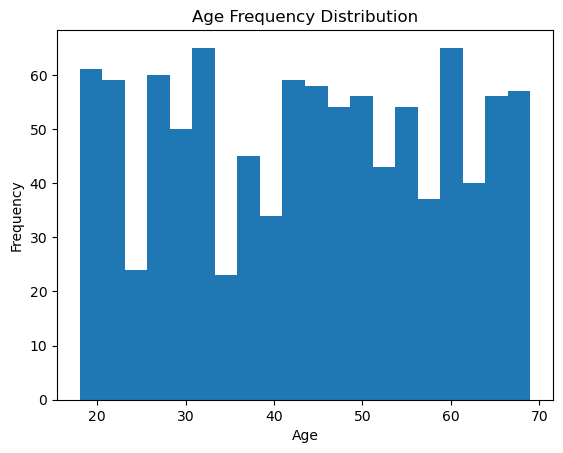

In [21]:
df["age"].hist(grid = False, bins = 20)
plt.title("Age Frequency Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency");


#### Age of customers didn't show any form of distribution.

In [22]:
# checking the proportion of customers across gender distribution
gender_distribution = df["gender"].value_counts()
gender_distribution

gender
Male      357
Other     327
Female    316
Name: count, dtype: int64

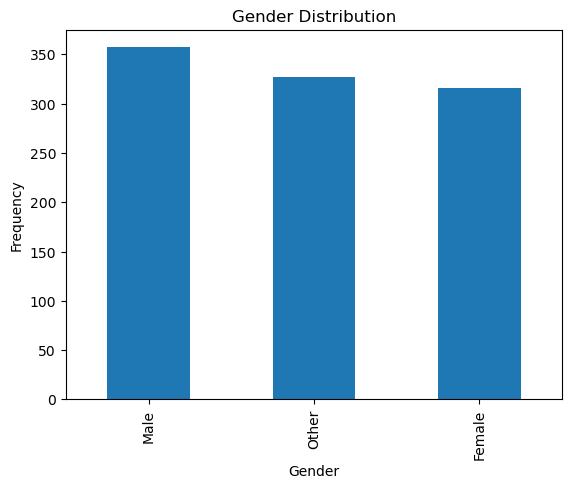

In [23]:
# creating in a barchart for gender distribution.
gender_distribution.plot(kind = "bar", xlabel = "Gender", ylabel = "Frequency", title = "Gender Distribution");

In [24]:
# creating a list of column names
df.columns

Index(['age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

In [25]:
# checking the uniques values in the preferred category field
df['preferred_category'].unique()

array(['Groceries', 'Sports', 'Clothing', 'Home & Garden', 'Electronics'],
      dtype=object)

In [26]:
# Proportion of the customer purchases for each purchase category
category_distribution = df['preferred_category'].value_counts(normalize = True)
category_distribution 

preferred_category
Electronics      0.215
Sports           0.210
Home & Garden    0.206
Groceries        0.199
Clothing         0.170
Name: proportion, dtype: float64

Text(0, 0.5, 'Product Category')

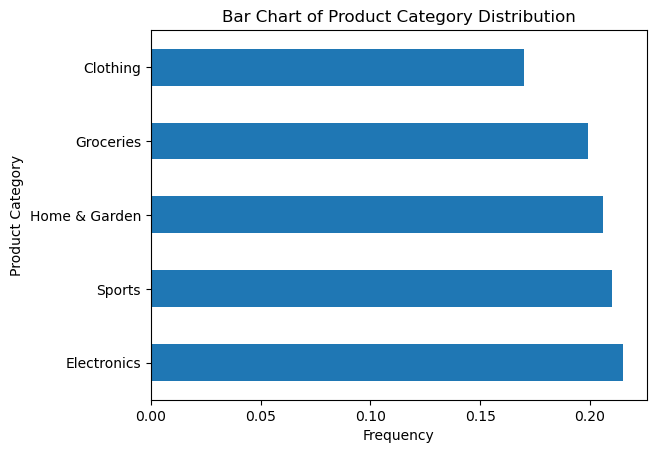

In [27]:
# Bar plot of product category distribution
category_distribution.plot(kind = 'barh', title = 'Bar Chart of Product Category Distribution')
plt.xlabel('Frequency')
plt.ylabel('Product Category')

In [28]:
# unique values of customers membership years
df['membership_years'].unique()

array([ 3,  2,  9,  5,  6,  7,  1,  4, 10,  8], dtype=int64)

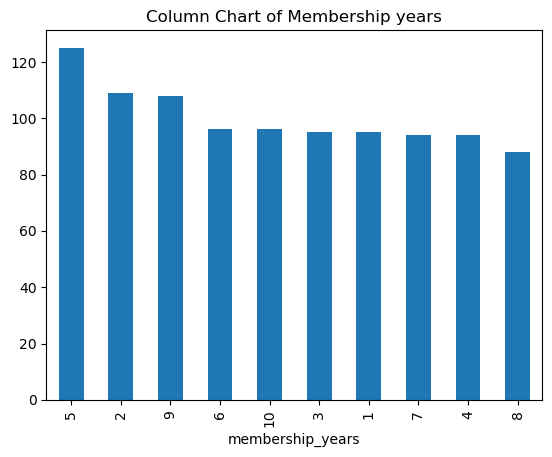

In [29]:
# barplot of the frequency of the customers membership years
df['membership_years'].value_counts().plot(kind = 'bar', title ='Column Chart of Membership years');

In [30]:
df.head()

age  gender  income  spending_score  membership_years  purchase_frequency  \
0   38  Female   99342              90                 3                  24   
1   21  Female   78852              60                 2                  42   
2   60  Female  126573              30                 2                  28   
3   40   Other   47099              74                 9                   5   
4   65  Female  140621              21                 3                  25   

  preferred_category  last_purchase_amount  
0          Groceries                113.53  
1             Sports                 41.93  
2           Clothing                424.36  
3      Home & Garden                991.93  
4        Electronics                347.08

In [31]:
# description of the two categorical variables
df.select_dtypes(include='object').describe()

gender preferred_category
count    1000               1000
unique      3                  5
top      Male        Electronics
freq      357                215

In [32]:
# checking for correlation between all the numeric fields
correlation = df.select_dtypes(include='number').corr()
correlation

age    income  spending_score  membership_years  \
age                   1.000000 -0.000688        0.017707         -0.003431   
income               -0.000688  1.000000        0.000020         -0.035783   
spending_score        0.017707  0.000020        1.000000          0.026726   
membership_years     -0.003431 -0.035783        0.026726          1.000000   
purchase_frequency   -0.030137  0.000533        0.006708          0.069532   
last_purchase_amount  0.061599 -0.054006       -0.014475         -0.014135   

                      purchase_frequency  last_purchase_amount  
age                            -0.030137              0.061599  
income                          0.000533             -0.054006  
spending_score                  0.006708             -0.014475  
membership_years                0.069532             -0.014135  
purchase_frequency              1.000000              0.024400  
last_purchase_amount            0.024400              1.000000

#### The  fields showed negligible positive and negative correlation meaning there are no relationship between the fields

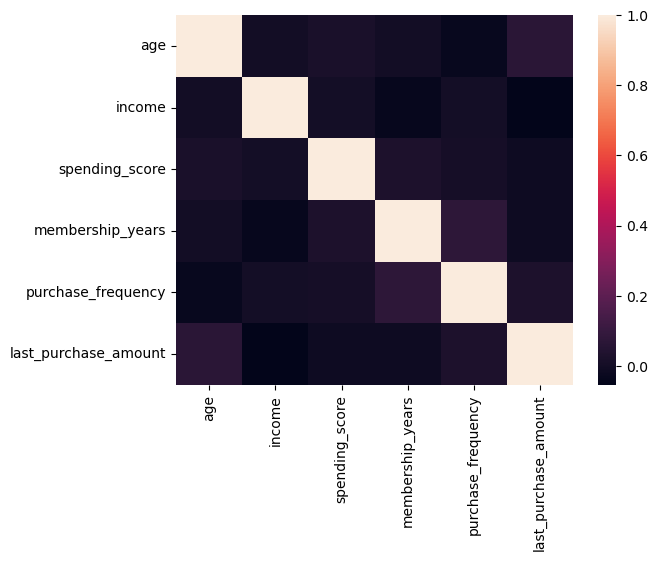

In [33]:
# A heatmap visualisation of the correlation matrix
sns.heatmap(correlation);

C:\Users\Erakab Edimulo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Erakab Edimulo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Erakab Edimulo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Erakab Edimulo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

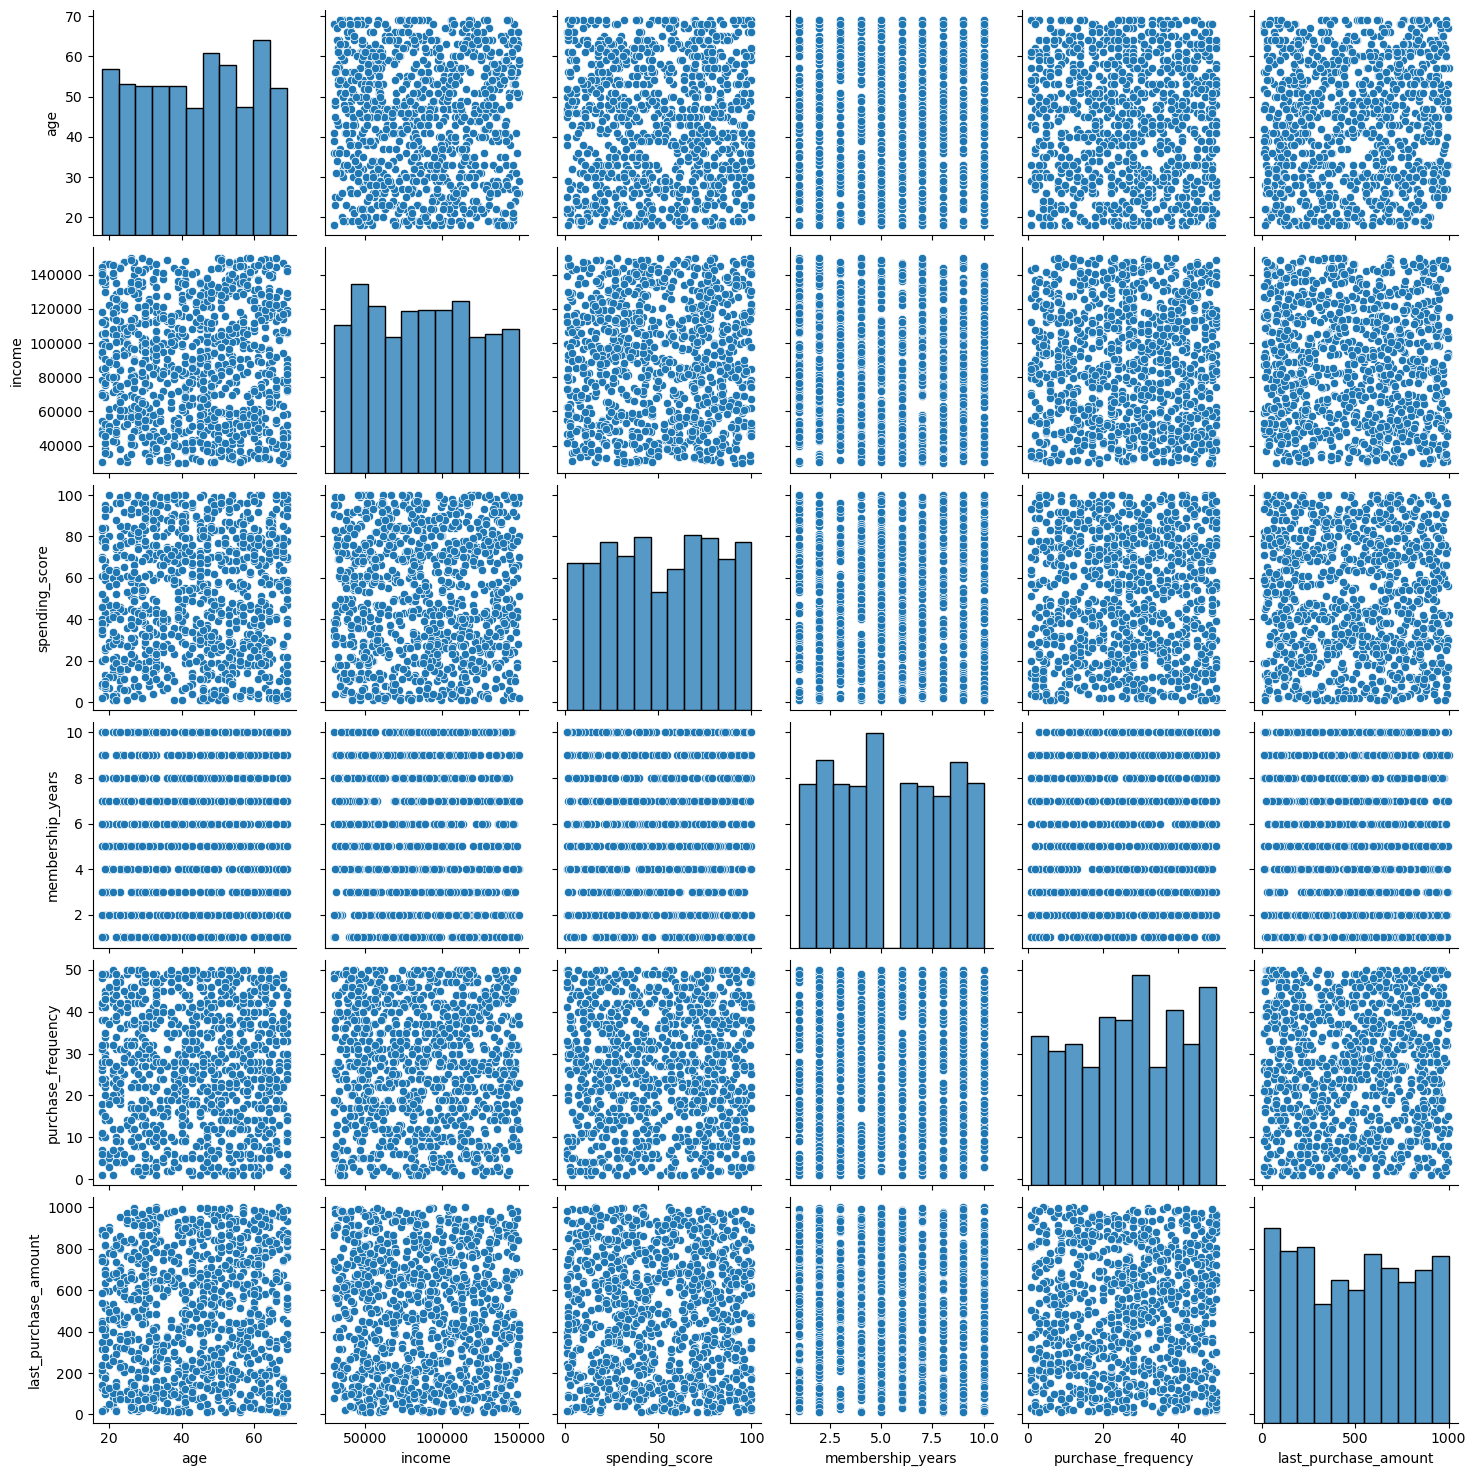

In [34]:
# creating a pairplot to check for linear correlation between the numeric field pairs
sns.pairplot(df.select_dtypes(include='number'));

#### There are no correlation between any of the field pairs.

In [35]:
# Making a copy of the cleaned dataset
df1 = df.copy()

# Model Building with PCA

In [36]:
df.columns

Index(['age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

In [37]:
df_train = df1.copy()

In [38]:
training_categories = ['gender', 'preferred_category']

In [39]:
training_numeric = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']

In [40]:
# Instantiating OrdinalEncoder for categorical encoding
ord = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)

In [41]:
# performing ml categotical encoding for the two categorical variables/fields
ord.fit(df_train[training_categories])
df_train[training_categories] = ord.transform(df_train[training_categories])

In [42]:
scaler = StandardScaler()

In [43]:
scaler.fit(df_train[training_numeric])
df_train[training_numeric] = scaler.transform(df_train[training_numeric])


In [44]:
X_train =df_train[training_categories + training_numeric].values

In [45]:
# instantiating PCA and fiting it to the training data
pca = PCA(n_components = 1)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [46]:
# saving the final pca trained kmeans model
with open('fitted_pca_1D.pkl', 'wb') as f:
    pickle.dump(pca, f)
print('Model saved successfuly as fitted_pca_1D.pkl')

Model saved successfuly as fitted_pca_1D.pkl


In [47]:
# hyperparameter tunning to determine the best n_clusters and silhouette score 
K = range(2,30)
silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_train_pca)
    score = silhouette_score(X_train_pca,  kmeans.labels_)
    silhouette_scores.append(score)
    print(f'For n_clusters {k}, silhouette_score = {score:.4f}')

For n_clusters 2, silhouette_score = 0.6658
For n_clusters 3, silhouette_score = 0.6953
For n_clusters 4, silhouette_score = 0.7424
For n_clusters 5, silhouette_score = 0.9235
For n_clusters 6, silhouette_score = 0.8377
For n_clusters 7, silhouette_score = 0.7734
For n_clusters 8, silhouette_score = 0.7166
For n_clusters 9, silhouette_score = 0.6344
For n_clusters 10, silhouette_score = 0.5735
For n_clusters 11, silhouette_score = 0.5656
For n_clusters 12, silhouette_score = 0.5514
For n_clusters 13, silhouette_score = 0.5397
For n_clusters 14, silhouette_score = 0.5414
For n_clusters 15, silhouette_score = 0.5295
For n_clusters 16, silhouette_score = 0.5297
For n_clusters 17, silhouette_score = 0.5287
For n_clusters 18, silhouette_score = 0.5266
For n_clusters 19, silhouette_score = 0.5232
For n_clusters 20, silhouette_score = 0.5274
For n_clusters 21, silhouette_score = 0.5320
For n_clusters 22, silhouette_score = 0.5304
For n_clusters 23, silhouette_score = 0.5319
For n_clusters 24,

In [48]:
# building final pca trained model
final_pca_model = make_pipeline(KMeans(n_clusters= 5, random_state= 42))
final_pca_model.fit(X_train_pca)
final_pca_model

Pipeline(steps=[('kmeans', KMeans(n_clusters=5, random_state=42))])

# Communicating Result

In [49]:
labels = final_pca_model.named_steps["kmeans"].labels_


In [50]:
# creating a dataframe for visualisation of clusters
df_train_viz = pd.DataFrame({'feature': X_train_pca.flatten(), 'cluster' : labels})

C:\Users\Erakab Edimulo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Erakab Edimulo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


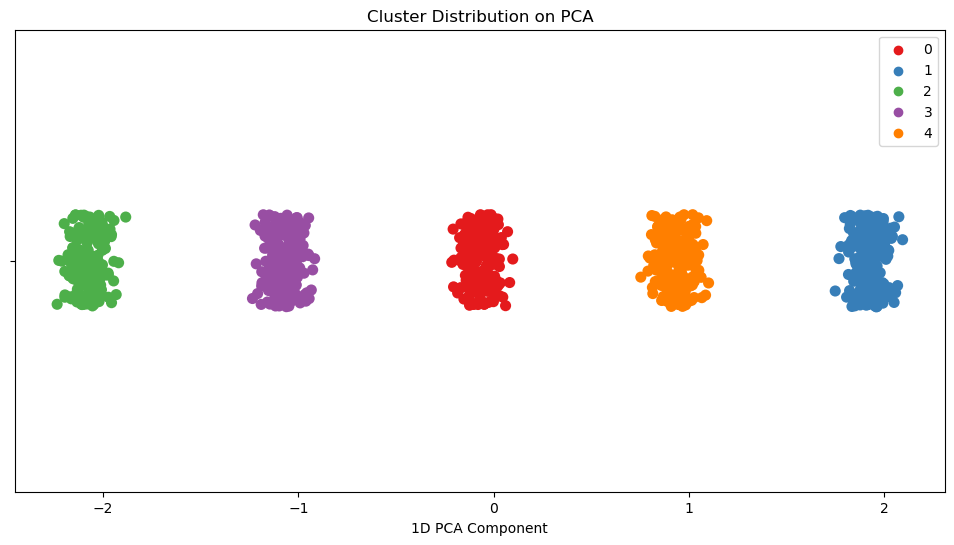

In [51]:
# creating cluster visualisation
plt.figure(figsize=(12, 6)) 
sns.stripplot(data = df_train_viz, x = 'feature', hue = 'cluster', size = 8, palette = 'Set1')
plt.title('Cluster Distribution on PCA')
plt.xlabel('1D PCA Component')
plt.legend()
plt.show();

In [52]:
# saving the final pca trained kmeans model
with open('final_pca_kmeans_model.pkl', 'wb') as f:
    pickle.dump(final_pca_model, f)
print('Model saved successfuly as final_pca_kmeans_model.pkl')

Model saved successfuly as final_pca_kmeans_model.pkl


# Model building with Variance

In [53]:
df.head()

age  gender  income  spending_score  membership_years  purchase_frequency  \
0   38  Female   99342              90                 3                  24   
1   21  Female   78852              60                 2                  42   
2   60  Female  126573              30                 2                  28   
3   40   Other   47099              74                 9                   5   
4   65  Female  140621              21                 3                  25   

  preferred_category  last_purchase_amount  
0          Groceries                113.53  
1             Sports                 41.93  
2           Clothing                424.36  
3      Home & Garden                991.93  
4        Electronics                347.08

In [54]:
# instantiating standard scaler for normalisation
scaler = StandardScaler()

In [55]:
# calculating the variance of the numeric features / variables
feat_variance = df.select_dtypes(include='number').var().sort_values(ascending = False)
feat_variance 

income                  1.171746e+09
last_purchase_amount    8.746466e+04
spending_score          8.384022e+02
age                     2.262682e+02
purchase_frequency      2.028817e+02
membership_years        8.155194e+00
dtype: float64

#### Income showed the highest variation followed by Last purchase amount.

In [56]:
# calculating trimmed variance.
df.select_dtypes(include='number').apply(trimmed_var).sort_values(ascending = False)

income                  7.381727e+08
last_purchase_amount    5.824875e+04
spending_score          5.339656e+02
age                     1.441531e+02
purchase_frequency      1.266824e+02
membership_years        5.210900e+00
dtype: float64

#### Even after trimming for outliers, income and last purchase amount showed the highest variance.

In [57]:
df.columns

Index(['age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

#### Since income is the showed the highest variance, it will be used for model training

In [58]:
features = ['income']

In [59]:
X = df[features]

In [60]:
X_scaled = scaler.fit_transform(X)

In [61]:
K = range(2,30)
silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled,  kmeans.labels_)
    silhouette_scores.append(score)
    print(f'For n_clusters {k}, silhouette_score = {score:.4f}')

For n_clusters 2, silhouette_score = 0.6195
For n_clusters 3, silhouette_score = 0.5928
For n_clusters 4, silhouette_score = 0.5809
For n_clusters 5, silhouette_score = 0.5623
For n_clusters 6, silhouette_score = 0.5443
For n_clusters 7, silhouette_score = 0.5382
For n_clusters 8, silhouette_score = 0.5446
For n_clusters 9, silhouette_score = 0.5447
For n_clusters 10, silhouette_score = 0.5464
For n_clusters 11, silhouette_score = 0.5382
For n_clusters 12, silhouette_score = 0.5358
For n_clusters 13, silhouette_score = 0.5362
For n_clusters 14, silhouette_score = 0.5333
For n_clusters 15, silhouette_score = 0.5328
For n_clusters 16, silhouette_score = 0.5294
For n_clusters 17, silhouette_score = 0.5530
For n_clusters 18, silhouette_score = 0.5531
For n_clusters 19, silhouette_score = 0.5493
For n_clusters 20, silhouette_score = 0.5459
For n_clusters 21, silhouette_score = 0.5452
For n_clusters 22, silhouette_score = 0.5453
For n_clusters 23, silhouette_score = 0.5428
For n_clusters 24,

In [62]:
silhouette_scores

[0.619472249860773,
 0.592773006841027,
 0.5808599596420085,
 0.5622866460481776,
 0.5442939324527504,
 0.5382251454549161,
 0.5445541718912248,
 0.5446790149563349,
 0.5463570678049674,
 0.5382157128057331,
 0.5357951784266954,
 0.5361774911355806,
 0.5333413180044718,
 0.5328445539460968,
 0.5294268544487801,
 0.5529945194567212,
 0.553096342514999,
 0.5493438406831899,
 0.5458973729928748,
 0.5452057757848991,
 0.5452999282616662,
 0.5427574493821283,
 0.5424761300166376,
 0.550588758476463,
 0.551329980147367,
 0.5540469257363902,
 0.5544568650269656,
 0.5496387794259081]

#### Number of clusters with the best silhouette score is 2. The final model will be made with n_clusters of 2

In [63]:
# building 
final_model = make_pipeline(StandardScaler(), KMeans(n_clusters= 2, random_state= 42))
final_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2, random_state=42))])

In [64]:
final_model.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2, random_state=42))])

In [65]:
labels = final_model.named_steps["kmeans"].labels_
xgb = X.groupby(labels).mean()
xgb

income
0   59647.909980
1  118651.775051

In [66]:
fig = px.bar(xgb,barmode="group",title="Mean Customer Income")
fig.update_layout(xaxis_title="Cluster",yaxis_title="Value [$]")

In [67]:
# creating a dataframe for visualisation of clusters
df_viz = pd.DataFrame({'feature': X_scaled.flatten(), 'cluster' : labels})

C:\Users\Erakab Edimulo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Erakab Edimulo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



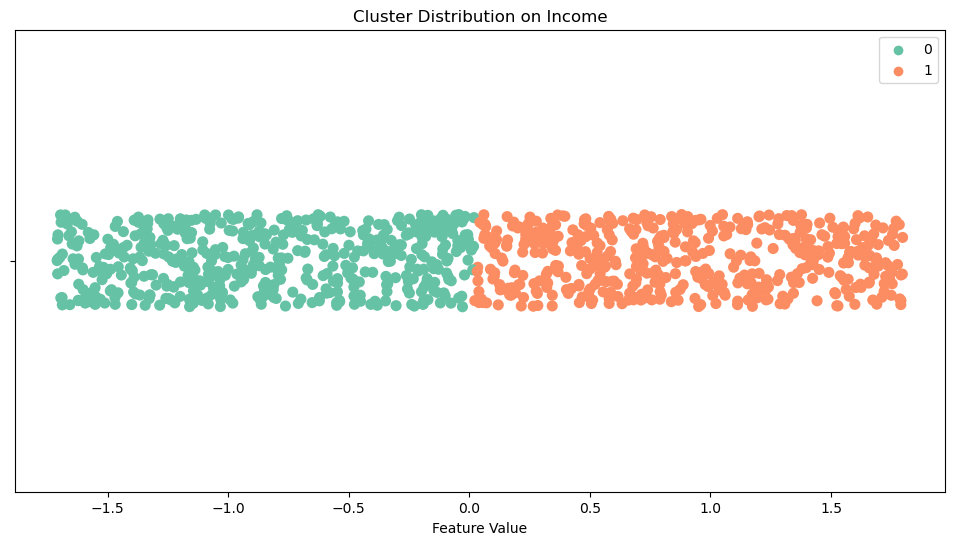

In [68]:
# creating cluster visualisation
plt.figure(figsize=(12, 6)) 
sns.stripplot(data = df_viz, x = 'feature', hue = 'cluster', size = 8, palette = 'Set2')
plt.title('Cluster Distribution on Income')
plt.xlabel('Feature Value')
plt.legend()
plt.show();

In [69]:
# saving the final trained kmeans model
with open('final_kmeans_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)
print('Model saved successfuly as final_kmeans_model.pkl')

Model saved successfuly as final_kmeans_model.pkl
